<a href="https://colab.research.google.com/github/Maxie503/CampusX-100Days-of-DL/blob/main/Day_57_RNN_Sentiment_Analysis_Tokenizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
docs = ['go india',
		'india india',
		'hip hip hurray',
		'jeetega bhai jeetega india jeetega',
		'bharat mata ki jai',
		'Poli pohli',
		'sach sachn',
		'dhan dhani',
		'godi ki jai',
		'zindabad zindab']

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [4]:
token = Tokenizer(oov_token='<nothing>')

In [5]:
token.fit_on_texts(docs)

In [6]:
token.word_index

{'<nothing>': 1,
 'india': 2,
 'jeetega': 3,
 'hip': 4,
 'ki': 5,
 'jai': 6,
 'go': 7,
 'hurray': 8,
 'bhai': 9,
 'bharat': 10,
 'mata': 11,
 'poli': 12,
 'pohli': 13,
 'sach': 14,
 'sachn': 15,
 'dhan': 16,
 'dhani': 17,
 'godi': 18,
 'zindabad': 19,
 'zindab': 20}

In [7]:
token.word_counts

OrderedDict([('go', 1),
             ('india', 4),
             ('hip', 2),
             ('hurray', 1),
             ('jeetega', 3),
             ('bhai', 1),
             ('bharat', 1),
             ('mata', 1),
             ('ki', 2),
             ('jai', 2),
             ('poli', 1),
             ('pohli', 1),
             ('sach', 1),
             ('sachn', 1),
             ('dhan', 1),
             ('dhani', 1),
             ('godi', 1),
             ('zindabad', 1),
             ('zindab', 1)])

In [8]:
len(token.word_counts)

19

In [9]:
len(token.word_index)

20

In [10]:
token.document_count

10

In [11]:
sequence = token.texts_to_sequences(docs)
sequence

[[7, 2],
 [2, 2],
 [4, 4, 8],
 [3, 9, 3, 2, 3],
 [10, 11, 5, 6],
 [12, 13],
 [14, 15],
 [16, 17],
 [18, 5, 6],
 [19, 20]]

In [12]:
from tensorflow.keras.utils import pad_sequences

In [13]:
pad_sequences(sequence,padding='pre')

array([[ 0,  0,  0,  7,  2],
       [ 0,  0,  0,  2,  2],
       [ 0,  0,  4,  4,  8],
       [ 3,  9,  3,  2,  3],
       [ 0, 10, 11,  5,  6],
       [ 0,  0,  0, 12, 13],
       [ 0,  0,  0, 14, 15],
       [ 0,  0,  0, 16, 17],
       [ 0,  0, 18,  5,  6],
       [ 0,  0,  0, 19, 20]], dtype=int32)

In [14]:
pad_sequences(sequence,padding='post')

array([[ 7,  2,  0,  0,  0],
       [ 2,  2,  0,  0,  0],
       [ 4,  4,  8,  0,  0],
       [ 3,  9,  3,  2,  3],
       [10, 11,  5,  6,  0],
       [12, 13,  0,  0,  0],
       [14, 15,  0,  0,  0],
       [16, 17,  0,  0,  0],
       [18,  5,  6,  0,  0],
       [19, 20,  0,  0,  0]], dtype=int32)

# imbd Analysis with pad_sequences

In [15]:
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding

In [16]:
(X_train,y_train),(X_test,y_test) = imdb.load_data()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [17]:
X_train.shape

(25000,)

In [18]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [19]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [20]:
X_train_pad = pad_sequences(X_train,padding='post',maxlen=50)
X_test_pad = pad_sequences(X_test,padding='post',maxlen=50)

In [21]:
X_train_pad.shape

(25000, 50)

In [29]:
m1 = Sequential()

m1.add(SimpleRNN(32, input_shape=(50,1), return_sequences=False))
m1.add(Dense(1, activation='sigmoid'))

m1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 32)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
m1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

hist = m1.fit(X_train_pad,y_train,epochs=5,validation_data=(X_test_pad,y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.4965 - loss: 0.7045 - val_accuracy: 0.5022 - val_loss: 0.6962
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5029 - loss: 0.6935 - val_accuracy: 0.5050 - val_loss: 0.6952
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5058 - loss: 0.6936 - val_accuracy: 0.5044 - val_loss: 0.6943
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5054 - loss: 0.6930 - val_accuracy: 0.5064 - val_loss: 0.6935
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5004 - loss: 0.6931 - val_accuracy: 0.5029 - val_loss: 0.6980


# imbd Analysis with Embedding

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Embedding,SimpleRNN

In [2]:
(X_train,y_train),(X_test,y_test)= imdb.load_data()

In [3]:
print(X_train[0])
print(len(X_train[0]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218


In [4]:
X_train_pad = pad_sequences(X_train,padding='post',maxlen=50)
X_test_pad = pad_sequences(X_test,padding='post',maxlen=50)

In [5]:
print(X_train_pad[0])
print(len(X_train_pad[0]))

[2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4  226   65   16   38 1334   88   12   16  283    5   16 4472  113
  103   32   15   16 5345   19  178   32]
50


In [6]:
m2 = Sequential()
m2.add(Embedding(10000,2, input_length=50))
m2.add(SimpleRNN(32,return_sequences=False))
m2.add(Dense(1,activation='sigmoid'))

m2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
m2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
hist2 = m2.fit(X_train_pad,y_train,epochs=10,validation_data=(X_test_pad,y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8726 - loss: 0.3191 - val_accuracy: 0.7775 - val_loss: 0.5081
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8812 - loss: 0.3069 - val_accuracy: 0.7738 - val_loss: 0.5410
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8933 - loss: 0.2778 - val_accuracy: 0.7656 - val_loss: 0.5708
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9095 - loss: 0.2453 - val_accuracy: 0.7546 - val_loss: 0.6062
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9146 - loss: 0.2303 - val_accuracy: 0.7511 - val_loss: 0.6459
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9221 - loss: 0.2123 - val_accuracy: 0.7474 - val_loss: 0.6717
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9297 - loss: 0.2007 - val_accuracy: 0.7516 - val_loss: 0.7023
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9327 - loss: 0.1967 - val_a

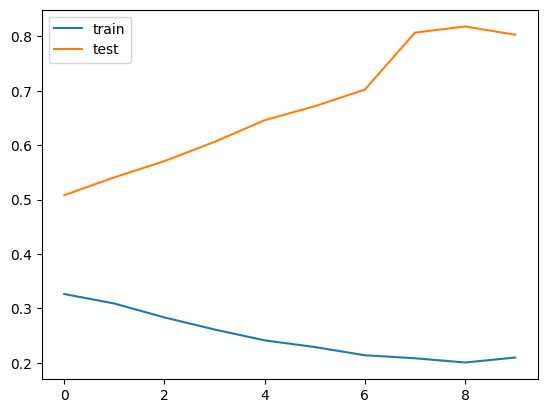

In [13]:
from types import LambdaType
import matplotlib.pyplot as plt

plt.plot(hist2.history['loss'], label='train')
plt.plot(hist2.history['val_loss'], label='test')
plt.legend()
plt.show()

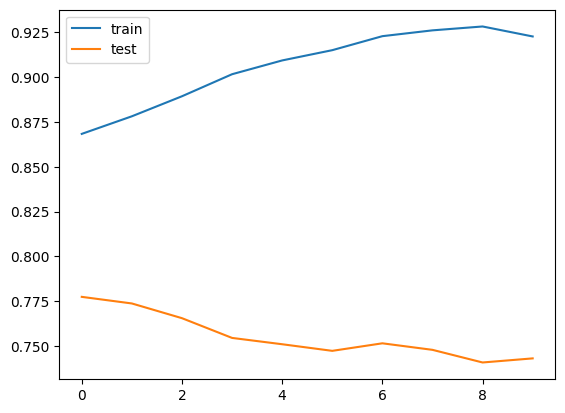

In [14]:
plt.plot(hist2.history['accuracy'], label='train')
plt.plot(hist2.history['val_accuracy'], label='test')
plt.legend()
plt.show()